In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({
    'font.size':18,
    'legend.fontsize':20,
    'axes.labelsize':12,
    'figure.titlesize':22,
    'lines.linewidth': 2.5,
    'lines.markersize': 12.0
})
#matplotlib.rcParams
import importlib
import data
importlib.reload(data)
from data import *

In [2]:
from scipy.optimize import curve_fit
t = np.arange(0,days_from_onset[-1]*10, 0.01)

[ 49.38500992   0.07880419 -52.62094331]


(0, 600)

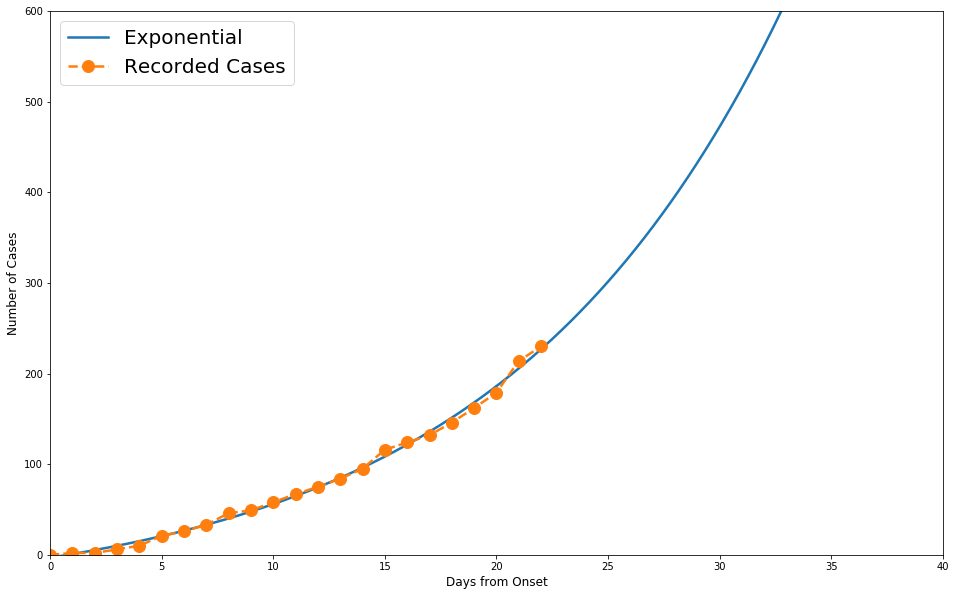

In [3]:
def expF(x,a,b,c):
    return a*np.exp(b*x)+c

ppotExpF,pcovExpF = curve_fit(expF,days_from_onset+1, total_cases, p0=[1,1,1e-5])
print(ppotExpF)

xExpF = expF(t, ppotExpF[0], ppotExpF[1],ppotExpF[2])

plt.figure(figsize=(16,10))
plt.plot(t, xExpF, label='Exponential')
plt.plot(days_from_onset+1, total_cases, 'o--', label='Recorded Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Days from Onset')
plt.legend(loc='best')
plt.xlim((0,40))
plt.ylim((0,600))


[ 9.87495593e+02 -5.12245251e+00 -4.88698131e-03]


(0, 600)

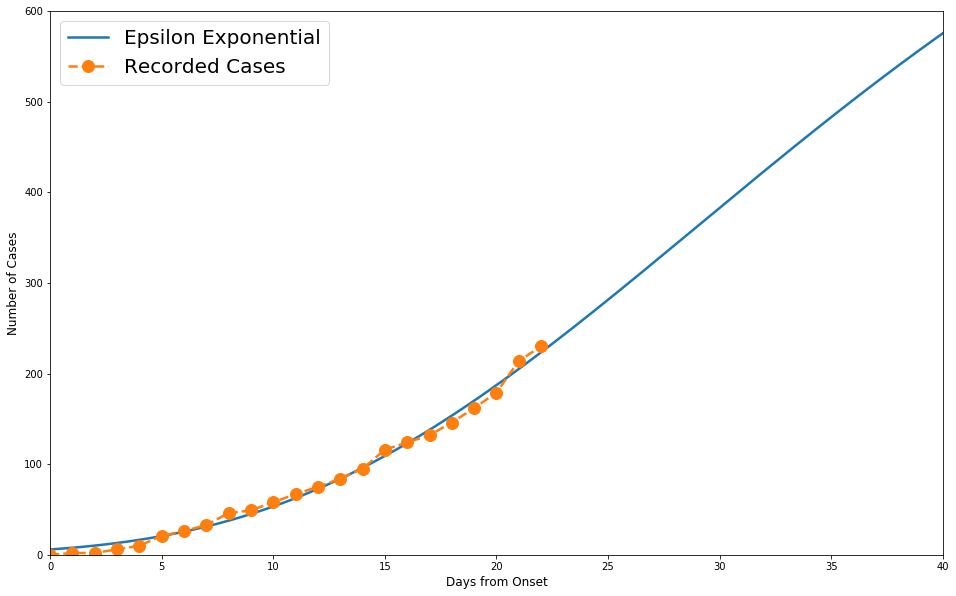

In [4]:
def epsilonExpF(x,a,b,c):
    epsilon=1e-5
    return  a*np.exp(b*epsilon**(-c*x))

ppotEpsilonExpF,pcovEpsilonExpF = curve_fit(epsilonExpF,days_from_onset+1, total_cases, p0=[1e2, 1e1,1e-3])
print(ppotEpsilonExpF)

plt.figure(figsize=(16,10))
xEpsilonExpF = epsilonExpF(t, ppotEpsilonExpF[0], ppotEpsilonExpF[1], ppotEpsilonExpF[2])
plt.plot(t,xEpsilonExpF, label='Epsilon Exponential')
plt.plot(days_from_onset+1, total_cases, 'o--', label='Recorded Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Days from Onset')
plt.legend(loc='best')
plt.xlim((0,40))
plt.ylim((0,600))

[1.82335802e-01 2.01194432e+01 3.81187083e+02]


(0, 600)

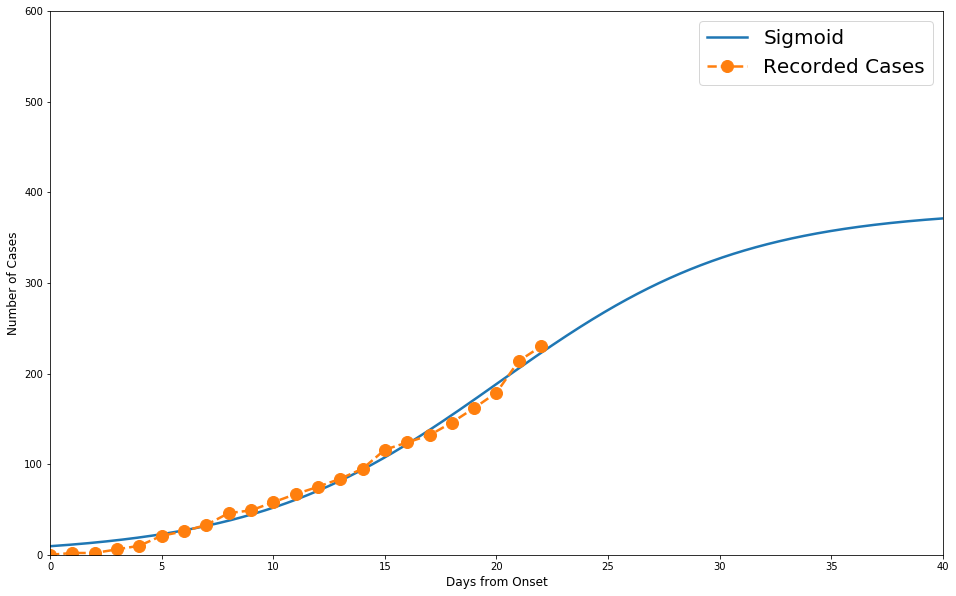

In [5]:
def sigmoidF(x,a,b,c):
    return  c / (1.0 + np.exp(-a*(x-b)))

ppotSigmoidF,pcovSigmoidF = curve_fit(sigmoidF,days_from_onset+1, total_cases, p0=[1,0.2,100])
print(ppotSigmoidF)

plt.figure(figsize=(16,10))

xSigmoid = sigmoidF(t, ppotSigmoidF[0], ppotSigmoidF[1], ppotSigmoidF[2])
plt.plot(t,xSigmoid, label='Sigmoid')
plt.plot(days_from_onset+1, total_cases, 'o--', label='Recorded Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Days from Onset')
plt.legend(loc='best')
plt.xlim((0,40))
plt.ylim((0,600))

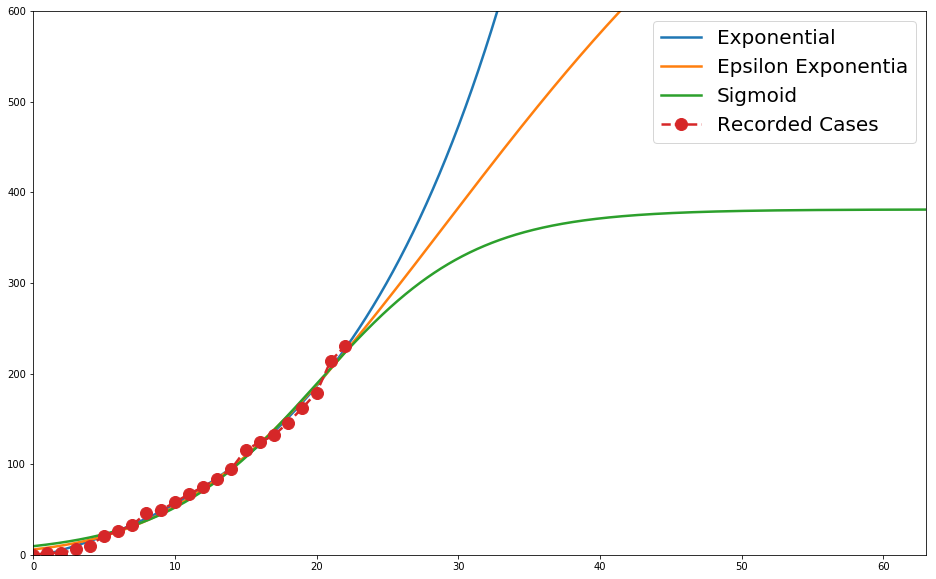

In [6]:
plt.figure(figsize=(16,10))

plt.plot(t,xExpF, label='Exponential')
plt.plot(t,xEpsilonExpF, label='Epsilon Exponentia')
plt.plot(t,xSigmoid, label='Sigmoid')

plt.xlim((0,days_from_onset[-1]*3))
plt.plot(days_from_onset+1, total_cases, 'o--',label='Recorded Cases' )
plt.ylim((0,600))

plt.legend(loc='best')